<a href="https://colab.research.google.com/github/SatoshiYoshino/Python/blob/master/Twitter%E5%88%86%E6%9E%90_SUZURI%EF%BC%BF20210613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from requests_oauthlib import OAuth1Session, OAuth1
import requests
import pandas as pd

# requests-oauthlibという Python 用の OAuth 認証ライブラリを用いてアクセスする。
#Requestsは、 Python の HTTP 通信ライブラリ。 
#Requests を使うとWebサイトの情報取得や画像の収集などを行うことができる。

In [ ]:
#TwitterのAPI-keyを入力
KEYS = {
    'consumer_key':'mSocPGfCHMpuRKsvM3tZexx5z',
    'consumer_secret':'f4cYUtqoRT2slWjssn5LhJVqeCp2PymPIw6mzL0bOcYfqwYbrd',
    'access_token':'1359065662279151619-9uP6YsG7sso5CSk8n526vB697xm5AE',
    'access_secret':'H1cI8ZI7kDF2YoUaKRq2lD35RmB5jmQs8IX04TKehXmpF',
}
#認証処理。数時間すると認証が切れる。
twitter = OAuth1Session(KEYS['consumer_key'],KEYS['consumer_secret'],KEYS['access_token'],KEYS['access_secret'])

In [ ]:
## ツイート情報取得用エンドポイントURL
url = "https://api.twitter.com/1.1/search/tweets.json"

#Standard search APIでツイートの取得
#q:検索クエリ、count：取得件数を指定最大１００、lang：言語指定
#result_type：取得するツイートの種類が選択できる　recentは、最新のツイート
params ={'q': "key_word", 'count':'100','lang':'ja', 'result_type':'recent'}

res = twitter.get(url, params = params)

In [ ]:
def getTwitterData(key_word, repeat):
    url = "https://api.twitter.com/1.1/search/tweets.json"
    params ={'q': key_word, 'count':'100','lang':'ja', 'result_type':'recent'}
    tweets = []
    mid = -1
    break_flag = 0

#max_idは、取得Tweetの範囲の指定　。「その数以下」を表し、その数自身を含む。since idは、「その数より大きい」を表し、その数自身は含まない
#max_id の初期値には-1を入れておく。こうすることで、最初の1回目は最新のTweetから100件取得してくれる。
#res = twitter.get(url, params = params)でTwitterからデータを取得
# if res.status_code == 200:　　httpレスポンスステータスコードで成功した場合200が返ってきた場合以下の処理をする
#sub_tweets = json.loads(res.text)['statuses']　：['statuses']　のデータをとってくる
# limit = res.headers['x-rate-limit-remaining'] if 'x-rate-limit-remaining' in res.headers else 0  :['x-rate-limit-remaining'] の値があったらその値を入れてなかったら０にする
# if len(tweet_ids) > 0:　文字列が０以上だった場合。
#  break_flag = 1以下だった場合（テキストがなかった場合）終了
#　　min_tweet_id = min(tweet_ids)　。　　　　　　min()で　リスト内の最小値を取得。
# 「mid = min_tweet_id - 1」は、FOR文開始１行目の「params['max_id'] = mid」で範囲が指定されているので
#その範囲の-1まで進めるという意味

    for i in range(repeat):
        params['max_id'] = mid
        res = twitter.get(url, params = params)
        if res.status_code == 200:
            sub_tweets = json.loads(res.text)['statuses']
            limit = res.headers['x-rate-limit-remaining'] if 'x-rate-limit-remaining' in res.headers else 0
#  print("API残接続可能回数：%s" % len(limit))            
            tweet_ids = []
            for tweet in sub_tweets:
                tweet_ids.append(int(tweet['id']))
                tweets.append(tweet)
            if len(tweet_ids) > 0:
                min_tweet_id = min(tweet_ids)
                mid = min_tweet_id - 1
            else:
                break_flag = 1
                break;
                
            ## 終了判定
            if break_flag == 1:
                break;
                
        else:
            print("Failed: %d" % res.status_code)
            break_flag = 1
    
    print("ツイート取得数：%s" % len(tweets))
        
    return tweets

In [ ]:
tweets = getTwitterData("SUZURI", 180)

Failed: 429
Failed: 429
ツイート取得数：17798


In [ ]:
df_tweet = pd.DataFrame(tweets)

In [ ]:
display(df_tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17798 entries, 0 to 17797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 17798 non-null  object 
 1   id                         17798 non-null  int64  
 2   id_str                     17798 non-null  object 
 3   text                       17798 non-null  object 
 4   truncated                  17798 non-null  bool   
 5   entities                   17798 non-null  object 
 6   metadata                   17798 non-null  object 
 7   source                     17798 non-null  object 
 8   in_reply_to_status_id      1851 non-null   float64
 9   in_reply_to_status_id_str  1851 non-null   object 
 10  in_reply_to_user_id        1867 non-null   float64
 11  in_reply_to_user_id_str    1867 non-null   object 
 12  in_reply_to_screen_name    1867 non-null   object 
 13  user                       17798 non-null  obj

None

In [ ]:
#エラーが出たのでデータの型を確認。「created_at」がobjectであるためエラーが起きていた
df_tweet.dtypes

created_at                    object
id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
retweeted_status              object
possibly_sensitive            object
extended_entities             object
q

In [ ]:
#日付の文字列の列に対してto_datetime()を適用し、datetime64[ns]型に変換
df_tweet['created_at'] = pd.to_datetime(df_tweet['created_at'])

In [ ]:
#変更されたかを確認
df_tweet.dtypes

created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                    object
text                                      object
truncated                                   bool
entities                                  object
metadata                                  object
source                                    object
in_reply_to_status_id                    float64
in_reply_to_status_id_str                 object
in_reply_to_user_id                      float64
in_reply_to_user_id_str                   object
in_reply_to_screen_name                   object
user                                      object
geo                                       object
coordinates                               object
place                                     object
contributors                              object
is_quote_status                             bool
retweet_count                              int64
favorite_count      

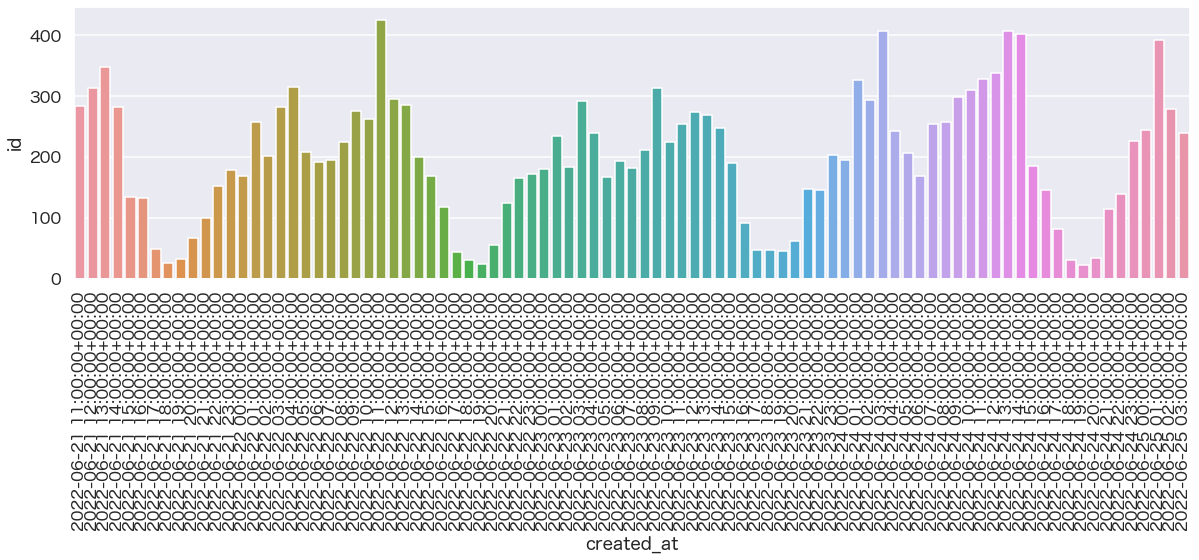

In [ ]:
#直近１週間の時間毎のSUZURIのツイート数推移をプロットしてみる

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
g = sns.barplot(x="created_at", y="id", data=df_tweet.set_index("created_at").resample("H")["id"].count().reset_index())
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=90)
plt.show()

#「TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'」というエラーが出た
#g = sns.barplot(x="created_at", y="id", data=df_tweet.set_index("created_at").resample("H")["id"].count().reset_index())の部分を修正

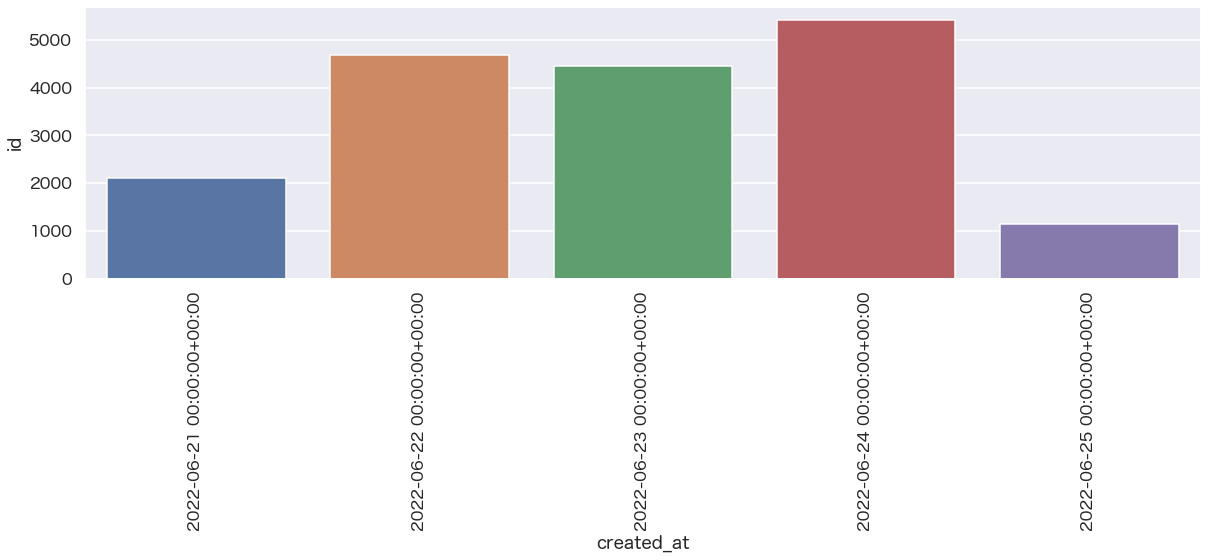

In [ ]:
#日別でプロットしてみる

plt.figure(figsize=(20,5))
g = sns.barplot(x="created_at", y="id", data=df_tweet.set_index("created_at").resample("D")["id"].count().reset_index())
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=90)
plt.show()

In [ ]:
df_tweet

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2022-06-25 03:46:22+00:00,1540541887601586176,1540541887601586176,@enigami102 ストーリー絡むとやはり好きになるよね！\n強敵討伐の奴とか時間あれば...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.540539e+18,1540538815244226560,...,0,False,False,ja,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-25 03:45:19+00:00,1540541623406211075,1540541623406211075,RT @suzurijp: ⏰週末限定！サンダルセール開催中⏰\n明日の23:59まで、サン...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,ja,{'created_at': 'Sat Jun 25 03:00:01 +0000 2022...,NaN,NaN,NaN,NaN,NaN
2,2022-06-25 03:45:13+00:00,1540541596521103360,1540541596521103360,RT @MG_chiyo: 【お知らせ】過去にイベント会場で手売りしてたモリゲームTシャツを...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,ja,{'created_at': 'Thu Jun 23 09:03:56 +0000 2022...,NaN,NaN,NaN,NaN,NaN
3,2022-06-25 03:45:07+00:00,1540541574161268736,1540541574161268736,RT @acubi_tomaranai: Tシャツありかも\nhttps://t.co/f1...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,ja,{'created_at': 'Sat Jun 25 03:39:01 +0000 2022...,False,NaN,NaN,NaN,NaN
4,2022-06-25 03:44:46+00:00,1540541485980200960,1540541485980200960,@yuu2hd 張遼と呂布！\n張遼は意外とソロでも活躍してくれてる\n呂布はやはり恋人がい...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.540529e+18,1540529039571423232,...,0,False,False,ja,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,2022-06-21 11:18:39+00:00,1539206158149615618,1539206158149615618,需要はともかく、いろいろ楽しく遊んでいます～😂\nhttps://t.co/HJ4HZqQn...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,105,False,False,ja,NaN,False,"{'media': [{'id': 1539206002218012672, 'id_str...",NaN,NaN,NaN
17794,2022-06-21 11:18:34+00:00,1539206135223181314,1539206135223181314,RT @suzurijp: 京極風斗(@9th_kyogoku)さんのバズがSUZURIでグ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,ja,{'created_at': 'Tue Jun 21 03:14:30 +0000 2022...,False,NaN,1.538466e+18,1538465850285764608,NaN
17795,2022-06-21 11:18:29+00:00,1539206114616950784,1539206114616950784,SUZURIの広告、\nもうちょっと何とかならん???????? https://t.co/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,4,False,False,ja,NaN,False,"{'media': [{'id': 1539206084141158401, 'id_str...",NaN,NaN,NaN
17796,2022-06-21 11:18:22+00:00,1539206085906599941,1539206085906599941,RT @iayaka52: 📌グッズ情報📌\n\nあーちゃん似顔絵ジップパーカー\n\nチャ...,False,"{'hashtags': [{'text': 'あーちゃんインフォ', 'indices':...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,ja,{'created_at': 'Mon Jun 20 22:00:02 +0000 2022...,False,NaN,NaN,NaN,NaN


In [ ]:
df = df_tweet.copy()
df = df.dropna(subset=["text"])

In [ ]:
import MeCab

In [ ]:
m = MeCab.Tagger('-Ochasen  -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

In [ ]:
def word_analysis(doc):
    node = m.parseToNode(doc)
    word_list=[]
    while node:
        hinshi = node.feature.split(",")[0]
        if hinshi == "名詞":
          word_list.append(node.feature.split(",")[6])
        node = node.next
    return word_list

In [ ]:
df["名詞"]=df["text"].apply(word_analysis)
#名詞の列を追加

In [ ]:
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,名詞
0,2022-06-25 03:46:22+00:00,1540541887601586176,1540541887601586176,@enigami102 ストーリー絡むとやはり好きになるよね！\n強敵討伐の奴とか時間あれば...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.540539e+18,1540538815244226560,...,False,False,ja,NaN,NaN,NaN,NaN,NaN,NaN,"[*, *, ストーリー, 好き, 強敵, 討伐, 奴, 時間, お手伝い, 末世, *]"
1,2022-06-25 03:45:19+00:00,1540541623406211075,1540541623406211075,RT @suzurijp: ⏰週末限定！サンダルセール開催中⏰\n明日の23:59まで、サン...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,False,ja,{'created_at': 'Sat Jun 25 03:00:01 +0000 2022...,NaN,NaN,NaN,NaN,NaN,"[ReTweet, *, 目覚まし時計, 週末, 限定, サンダル, セール, 開催中, 明..."
2,2022-06-25 03:45:13+00:00,1540541596521103360,1540541596521103360,RT @MG_chiyo: 【お知らせ】過去にイベント会場で手売りしてたモリゲームTシャツを...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,False,ja,{'created_at': 'Thu Jun 23 09:03:56 +0000 2022...,NaN,NaN,NaN,NaN,NaN,"[ReTweet, MG, CHiYO, お知らせ, 過去, イベント会場, 手, *, T..."
3,2022-06-25 03:45:07+00:00,1540541574161268736,1540541574161268736,RT @acubi_tomaranai: Tシャツありかも\nhttps://t.co/f1...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,ja,{'created_at': 'Sat Jun 25 03:39:01 +0000 2022...,False,NaN,NaN,NaN,NaN,"[ReTweet, *, *, Tシャツ, 在処, HTTPS, *, *, F1, *, ..."
4,2022-06-25 03:44:46+00:00,1540541485980200960,1540541485980200960,@yuu2hd 張遼と呂布！\n張遼は意外とソロでも活躍してくれてる\n呂布はやはり恋人がい...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.540529e+18,1540529039571423232,...,False,False,ja,NaN,NaN,NaN,NaN,NaN,NaN,"[YU, U2, HD, 張遼, 呂布, 張遼, ソロ, 活躍, 呂布, 恋人, ほう, 感..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,2022-06-21 11:18:39+00:00,1539206158149615618,1539206158149615618,需要はともかく、いろいろ楽しく遊んでいます～😂\nhttps://t.co/HJ4HZqQn...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,False,ja,NaN,False,"{'media': [{'id': 1539206002218012672, 'id_str...",NaN,NaN,NaN,"[需要, いま, HTTPS, *, *, HJ, *, *, *, *, 今回, *, デ..."
17794,2022-06-21 11:18:34+00:00,1539206135223181314,1539206135223181314,RT @suzurijp: 京極風斗(@9th_kyogoku)さんのバズがSUZURIでグ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,ja,{'created_at': 'Tue Jun 21 03:14:30 +0000 2022...,False,NaN,1.538466e+18,1538465850285764608,NaN,"[ReTweet, *, 京極, 風斗, 9t, *, *, さん, BUZZ, *, グッ..."
17795,2022-06-21 11:18:29+00:00,1539206114616950784,1539206114616950784,SUZURIの広告、\nもうちょっと何とかならん???????? https://t.co/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,False,ja,NaN,False,"{'media': [{'id': 1539206084141158401, 'id_str...",NaN,NaN,NaN,"[*, 広告, HTTPS, *, *, *]"
17796,2022-06-21 11:18:22+00:00,1539206085906599941,1539206085906599941,RT @iayaka52: 📌グッズ情報📌\n\nあーちゃん似顔絵ジップパーカー\n\nチャ...,False,"{'hashtags': [{'text': 'あーちゃんインフォ', 'indices':...","{'iso_language_code': 'ja', 'result_type': 're...

In [ ]:
import itertools
import collections
##この部分で抽出条件をいろいろ設定する
##　男性だけの名詞を検索。男性の部分を20代にするなど調整する事でいろいろ抽出できる
word_pickup = df["名詞"]

words =list( itertools.chain.from_iterable(word_pickup))
c = collections.Counter(words)

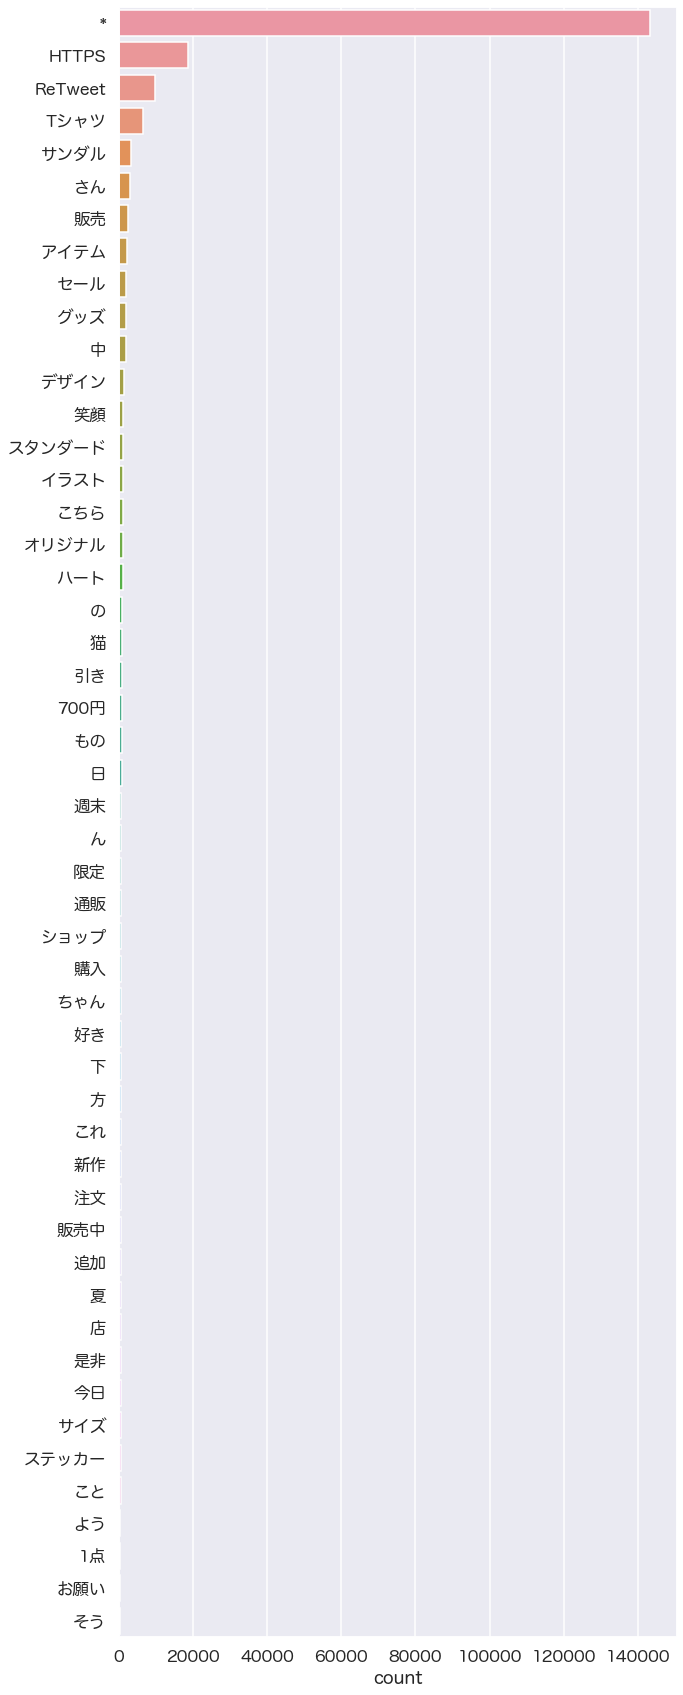

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font = "Hiragino Maru Gothic Pro",context="talk")
#文字を大きくしたい場合は、context="talk"で大きい順（　poster,talk,notebook,paper）で文字サイズを調整する
fig = plt.subplots(figsize=(10,30))
sns.countplot(y=words,order=[i[0] for i in c.most_common(50)])

In [ ]:
string = ",".join(words)
string_new = string.replace('*', '')
words_new = string_new.split(",")
print(words_new)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


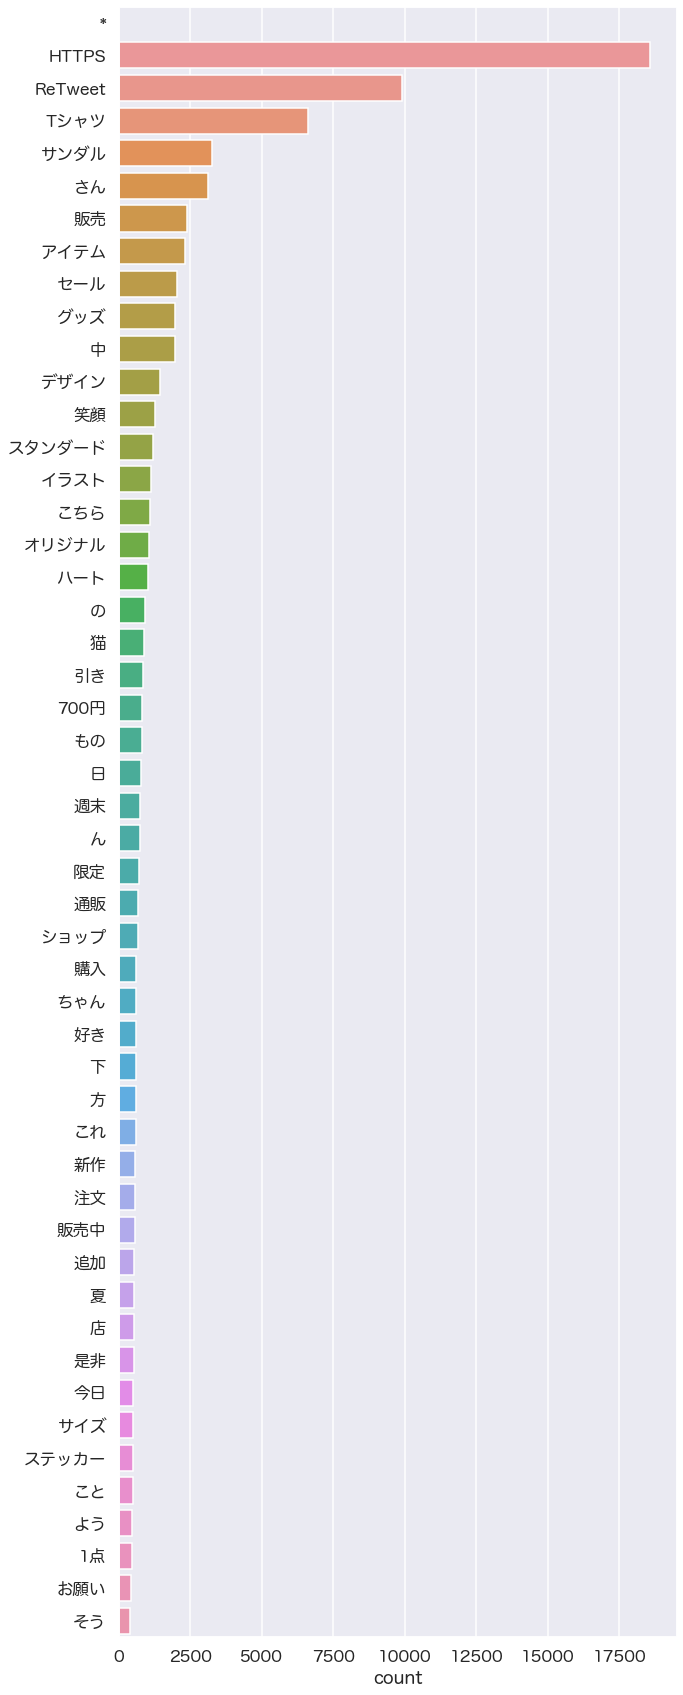

In [ ]:
sns.set(font = "Hiragino Maru Gothic Pro",context="talk")
#文字を大きくしたい場合は、context="talk"で大きい順（　poster,talk,notebook,paper）で文字サイズを調整する
fig = plt.subplots(figsize=(10,30))
sns.countplot(y=words_new,order=[i[0] for i in c.most_common(50)])

stop　キーワードの除去は、この後学んでいく